In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math, random
import seaborn as sn
import numpy as np

In [2]:
dataInitial = pd.read_csv("pollution_2000_2021.csv")

In [3]:
dataInitial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               608699 non-null  object 
 1   Year               608699 non-null  int64  
 2   Month              608699 non-null  int64  
 3   Day                608699 non-null  int64  
 4   Address            608699 non-null  object 
 5   State              608699 non-null  object 
 6   County             608699 non-null  object 
 7   City               608699 non-null  object 
 8   O3 Mean            608699 non-null  float64
 9   O3 1st Max Value   608699 non-null  float64
 10  O3 1st Max Hour    608699 non-null  int64  
 11  O3 AQI             608699 non-null  int64  
 12  CO Mean            608699 non-null  float64
 13  CO 1st Max Value   608699 non-null  float64
 14  CO 1st Max Hour    608699 non-null  int64  
 15  CO AQI             608699 non-null  float64
 16  SO

In [4]:
numeric_data = dataInitial.iloc[:,8:]
numeric_data.head(5)
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608699 entries, 0 to 608698
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   O3 Mean            608699 non-null  float64
 1   O3 1st Max Value   608699 non-null  float64
 2   O3 1st Max Hour    608699 non-null  int64  
 3   O3 AQI             608699 non-null  int64  
 4   CO Mean            608699 non-null  float64
 5   CO 1st Max Value   608699 non-null  float64
 6   CO 1st Max Hour    608699 non-null  int64  
 7   CO AQI             608699 non-null  float64
 8   SO2 Mean           608699 non-null  float64
 9   SO2 1st Max Value  608699 non-null  float64
 10  SO2 1st Max Hour   608699 non-null  int64  
 11  SO2 AQI            608699 non-null  float64
 12  NO2 Mean           608699 non-null  float64
 13  NO2 1st Max Value  608699 non-null  float64
 14  NO2 1st Max Hour   608699 non-null  int64  
 15  NO2 AQI            608699 non-null  int64  
dtypes:

In [5]:
numeric_data = numeric_data.rename(columns=
                                   {"O3 Mean":"o3mean","O3 1st Max Value":"o3firstMax",
                                   "O3 1st Max Hour":"o3firstMaxHour" , "O3 AQI":"o3aqi",
                                   "CO Mean":"comean","CO 1st Max Value":"cofirstMax",
                                   "CO 1st Max Hour":"cofirstMaxHour" , "CO AQI":"coaqi",
                                   "SO2 Mean":"so2mean","SO2 1st Max Value":"so2firstMax",
                                   "SO2 1st Max Hour":"so2firstMaxHour" , "SO2 AQI":"so2aqi",
                                   "NO2 Mean":"no2mean","NO2 1st Max Value":"no2firstMax",
                                   "NO2 1st Max Hour":"no2firstMaxHour" , "NO2 AQI":"no2aqi"})
numeric_data.head(5)

,o3mean,o3firstMax,o3firstMaxHour,o3aqi,comean,cofirstMax,cofirstMaxHour,coaqi,so2mean,so2firstMax,so2firstMaxHour,so2aqi,no2mean,no2firstMax,no2firstMaxHour,no2aqi
0,0.019765,0.040,10,37,0.878947,2.2,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,0.015882,0.032,10,30,1.066667,2.3,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,0.009353,0.016,9,15,1.762500,2.5,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,0.015882,0.033,9,31,1.829167,3.0,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,0.007353,0.012,9,11,2.700000,3.7,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


In [6]:
# columna = numeric_data.columns[0]
# quartiles = numeric_data[columna].quantile([0.25,0.5,0.75])
# iqr = quartiles[0.75] - quartiles[0.25]
# above = quartiles[0.75] + (1.5 * iqr)
# below = quartiles[0.25] - (1.5 * iqr)

# for item in numeric_data[columna]:
#     if (item != None):
#         if (item < below):
#             numeric_data[columna][item] = None
#         if (item > above):
#             numeric_data[columna][item] = None
    
# print(numeric_data[columna].isnull().sum() ) 


#################################################
### OUTLIER ANALYSIS INITIAL FRAME ##############
#################################################

In [23]:
def percentofNull(frame):
    nulos = frame.isnull().sum().sum()
    percentageNull = nulos / (frame.shape[0] * frame.shape[1])
    print('Percentage of Null values in the frame is ',percentageNull*100, "%")

In [8]:
def outliersToNone(frame):
    columnas = frame.columns
    number_outliers = []
    for columna in columnas:
        count = 0
        quartiles = frame[columna].quantile([0.25, 0.50, 0.75])
        iqr = quartiles[0.75] - quartiles[0.25]
        above = quartiles[0.75] + (1.5 * iqr)
        below = quartiles[0.25] - (1.5 * iqr)
        for i in range(len(frame[columna])):
            if (frame[columna][i] != None):
                if ( (frame[columna][i] < below) | (frame[columna][i] > above) ):
                    frame[columna][i] = np.nan
                    count += 1
        print(columna, count)
        number_outliers.append({columna : count})
    return number_outliers

In [10]:
a = outliersToNone(numeric_data)

C:\Users\jerry\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


o3mean 2836
o3firstMax 8985


C:\Users\jerry\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


o3firstMaxHour 56457
o3aqi 49801
comean 39708
cofirstMax 32124
cofirstMaxHour 38150
coaqi 32120
so2mean 58163
so2firstMax 70463
so2firstMaxHour 0
so2aqi 61256
no2mean 17989
no2firstMax 5245
no2firstMaxHour 0
no2aqi 6861


In [11]:
percentofNull(numeric_data)

Percentage of Null values in the frame is  0.049301666340835125 %


In [12]:
numeric_data

,o3mean,o3firstMax,o3firstMaxHour,o3aqi,comean,cofirstMax,cofirstMaxHour,coaqi,so2mean,so2firstMax,so2firstMaxHour,so2aqi,no2mean,no2firstMax,no2firstMaxHour,no2aqi
0,0.019765,0.040,10.0,37.0,NaN,NaN,NaN,NaN,3.000000,9.0,21,13.0,19.041667,49.0,19,46.0
1,0.015882,0.032,10.0,30.0,NaN,NaN,0.0,NaN,1.958333,3.0,22,4.0,22.958333,36.0,19,34.0
2,0.009353,0.016,9.0,15.0,NaN,NaN,8.0,NaN,NaN,NaN,19,NaN,NaN,51.0,8,48.0
3,0.015882,0.033,9.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,8,NaN
4,0.007353,0.012,9.0,11.0,NaN,NaN,2.0,NaN,NaN,NaN,7,NaN,NaN,61.0,22,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608694,0.040588,0.049,10.0,45.0,0.100000,0.1,0.0,1.0,0.409091,0.7,2,0.0,1.281818,2.1,0,2.0
608695,0.037882,0.042,10.0,39.0,0.100000,0.1,0.0,1.0,0.325000,0.4,4,0.0,1.104167,2.3,20,2.0
608696,0.039765,0.050,9.0,46.0,0.100000,0.1,0.0,1.0,0.326087,0.5,2,0.0,1.678261,5.8,23,5.0
608697,0.049176,0.058,10.0,61.0,0.066667,0.1,0.0,1.0,0.317391,0.5,20,0.0,2.934783,7.4,0,7.0


In [14]:
numeric_data.isnull().sum().sum()

480158

In [15]:
data = numeric_data.dropna(axis=0, how='any')

{'whiskers': [<matplotlib.lines.Line2D at 0x1408975e988>,
 'caps': [<matplotlib.lines.Line2D at 0x1408976d608>,
 'boxes': [<matplotlib.lines.Line2D at 0x1408974d848>,
 'medians': [<matplotlib.lines.Line2D at 0x1408976df88>,
 'fliers': [<matplotlib.lines.Line2D at 0x1408d572888>,
 'means': []}

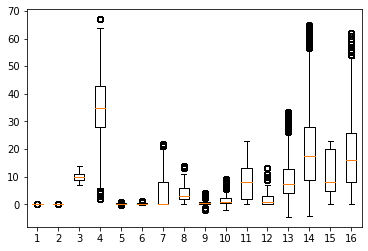

In [16]:
plt.boxplot([data[indexs] for indexs in data.columns])

In [17]:
data.shape

(385922, 16)

In [20]:
data.reset_index(drop=True, inplace=True)

In [21]:
data

,o3mean,o3firstMax,o3firstMaxHour,o3aqi,comean,cofirstMax,cofirstMaxHour,coaqi,so2mean,so2firstMax,so2firstMaxHour,so2aqi,no2mean,no2firstMax,no2firstMaxHour,no2aqi
0,0.021765,0.041,10.0,38.0,0.645833,1.0,8.0,11.0,1.000000,3.0,21,4.0,26.708333,43.0,21,41.0
1,0.018235,0.031,11.0,29.0,0.387500,0.5,0.0,6.0,0.333333,2.0,7,3.0,18.708333,39.0,23,37.0
2,0.022353,0.042,11.0,39.0,0.566667,1.1,0.0,13.0,0.916667,5.0,23,7.0,23.130435,49.0,23,46.0
3,0.028353,0.035,7.0,32.0,0.429167,0.6,19.0,7.0,0.000000,0.0,0,0.0,18.583333,33.0,17,31.0
4,0.019353,0.034,10.0,31.0,0.458333,0.7,0.0,8.0,0.000000,0.0,0,0.0,24.083333,41.0,18,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385917,0.040588,0.049,10.0,45.0,0.100000,0.1,0.0,1.0,0.409091,0.7,2,0.0,1.281818,2.1,0,2.0
385918,0.037882,0.042,10.0,39.0,0.100000,0.1,0.0,1.0,0.325000,0.4,4,0.0,1.104167,2.3,20,2.0
385919,0.039765,0.050,9.0,46.0,0.100000,0.1,0.0,1.0,0.326087,0.5,2,0.0,1.678261,5.8,23,5.0
385920,0.049176,0.058,10.0,61.0,0.066667,0.1,0.0,1.0,0.317391,0.5,20,0.0,2.934783,7.4,0,7.0


In [22]:
b = outliersToNone(data)

C:\Users\jerry\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\jerry\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


o3mean 20
o3firstMax 898
o3firstMaxHour 0
o3aqi 4711
comean 14118
cofirstMax 9083
cofirstMaxHour 24125
coaqi 4532
so2mean 21944
so2firstMax 26207
so2firstMaxHour 0
so2aqi 24457
no2mean 9287
no2firstMax 1150
no2firstMaxHour 0
no2aqi 1115


In [24]:
percentofNull(data)

Percentage of Null values in the frame is  2.293970672830261 %


In [25]:
data2 = data.dropna(axis=0, how='any')

In [27]:
data2.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1408d4889c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1408d48b508>,
 'boxes': [<matplotlib.lines.Line2D at 0x1408d4883c8>,
 'medians': [<matplotlib.lines.Line2D at 0x1408d48bdc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1408d494588>,
 'means': []}

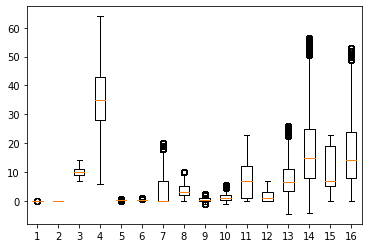

In [28]:
plt.boxplot([data2[indexs] for indexs in data2.columns])

In [29]:
data2.shape

(306104, 16)

In [ ]:
data2.to_csv('pollution.csv')

In [29]:
outliersInCopy

[{'o3mean': 2836},
 {'o3firstMax': 8985},
 {'o3firstMaxHour': 56457},
 {'o3aqi': 49771},
 {'comean': 39708},
 {'cofirstMax': 32124},
 {'cofirstMaxHour': 38150},
 {'coaqi': 32055},
 {'so2mean': 58139},
 {'so2firstMax': 70413},
 {'so2firstMaxHour': 0},
 {'so2aqi': 61226},
 {'no2mean': 17973},
 {'no2firstMax': 5243},
 {'no2firstMaxHour': 0},
 {'no2aqi': 6861}]